In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
# Load dataset
dataset_path = r"D:\Infosys SpringBoard Virtual Internship 6.0\accidents_cleaned.csv"
df = pd.read_csv(dataset_path)

# Display basic info
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (879273, 42)


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),City,County,State,Zipcode,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Duration_Minutes,Hour,DayOfWeek,Month,IsWeekend,IsDay
0,1,26.706900,-80.119360,26.706900,-80.119360,0.00,West Palm Beach,Palm Beach,FL,33417-4638,...,0,0,1,0,60.000000,9,4,4,0,1
1,3,33.985249,-84.269348,36.232482,-89.665492,0.00,Alpharetta,Fulton,GA,30022,...,0,0,0,0,30.000000,16,4,8,0,1
2,3,47.118706,-122.556908,36.232482,-89.665492,0.00,Tacoma,Pierce,WA,98433,...,0,0,0,0,33.733333,15,4,9,0,1
3,2,33.451355,-111.890343,36.232482,-89.665492,0.00,Scottsdale,Maricopa,AZ,85256,...,0,0,0,0,76.433333,16,0,6,0,1
4,2,42.448910,-93.721138,36.232482,-89.665492,7.77,Webster City,Hamilton,IA,50595,...,0,0,0,0,242.900000,12,3,2,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879273 entries, 0 to 879272
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           879273 non-null  int64  
 1   Start_Lat          879273 non-null  float64
 2   Start_Lng          879273 non-null  float64
 3   End_Lat            879273 non-null  float64
 4   End_Lng            879273 non-null  float64
 5   Distance(mi)       879273 non-null  float64
 6   City               879273 non-null  object 
 7   County             879273 non-null  object 
 8   State              879273 non-null  object 
 9   Zipcode            879273 non-null  object 
 10  Country            879273 non-null  object 
 11  Timezone           879273 non-null  object 
 12  Airport_Code       879273 non-null  object 
 13  Weather_Timestamp  879273 non-null  object 
 14  Temperature(F)     879273 non-null  float64
 15  Wind_Chill(F)      879273 non-null  float64
 16  Hu

C:\Users\syamc\AppData\Local\Temp\ipykernel_19348\3445889565.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='viridis')


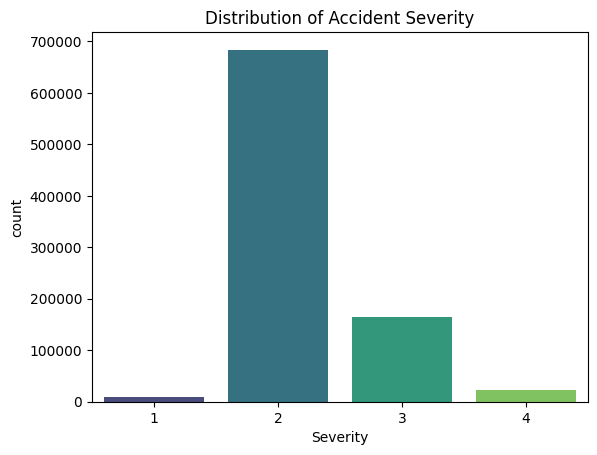

In [3]:
# Check data info and missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum().sort_values(ascending=False).head(10))

# Drop columns that are mostly missing or irrelevant (if necessary)
# Example (uncomment if you want to reduce dimensionality):
# df = df.drop(columns=['Wind_Chill(F)', 'Precipitation(in)', 'Weather_Timestamp'], errors='ignore')

# Check unique values of target variable
print("\nSeverity value counts:\n", df['Severity'].value_counts())
sns.countplot(x='Severity', data=df, palette='viridis')
plt.title("Distribution of Accident Severity")
plt.show()


In [4]:
# Define target and features
target = 'Severity'
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

print("Categorical columns:", categorical_cols[:10])
print("Numerical columns:", numerical_cols[:10])


Categorical columns: ['City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition']
Numerical columns: ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)']


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numeric pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine into a column transformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)
])


In [6]:
# Split the data into train and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (615491, 41)
Testing set size: (263782, 41)


In [7]:
# Create pipeline with preprocessor + classifier
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        random_state=42,
        max_iter=100,
        solver='saga',
        class_weight='balanced'  # Handle imbalance
    ))
])

# Fit model
clf_lr.fit(X_train, y_train)

print("✅ Model training complete!")


✅ Model training complete!


C:\Users\syamc\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


🔹 Logistic Regression Accuracy: 0.5050

Classification Report:
               precision    recall  f1-score   support

           1       0.05      0.82      0.09      2581
           2       0.93      0.47      0.62    205150
           3       0.43      0.63      0.51     49183
           4       0.10      0.64      0.17      6868

    accuracy                           0.50    263782
   macro avg       0.38      0.64      0.35    263782
weighted avg       0.81      0.50      0.58    263782



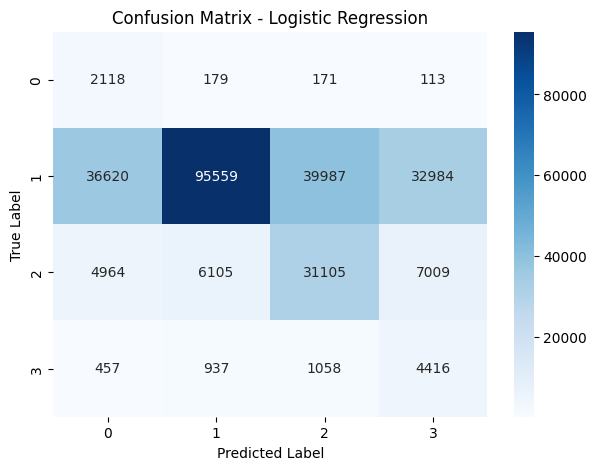

In [8]:
# Predict on test data
y_pred_lr = clf_lr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_lr)
print(f"🔹 Logistic Regression Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix Visualization
plt.figure(figsize=(7,5))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [9]:
# Macro F1 and class recall insight
report = classification_report(y_test, y_pred_lr, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report[['precision','recall','f1-score','support']].round(2)


,precision,recall,f1-score,support
1,0.05,0.82,0.09,2581.0
2,0.93,0.47,0.62,205150.0
3,0.43,0.63,0.51,49183.0
4,0.10,0.64,0.17,6868.0
accuracy,0.50,0.50,0.50,0.5
macro avg,0.38,0.64,0.35,263782.0
weighted avg,0.81,0.50,0.58,263782.0
